In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [102]:
x_train = pd.read_csv("covid_x_train.csv")
x_test = pd.read_csv("covid_x_test.csv")
y_train = pd.read_csv("covid_y_train.csv")
y_test = pd.read_csv("covid_y_test.csv")

In [103]:
x_train = x_train.set_index('date')
x_train.index = pd.to_datetime(x_train.index)

In [104]:
x_train

,location_key_x,country_code,new_deceased,cumulative_deceased,population,population_male,population_female,latitude,longitude,area_sq_km,...,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R4.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,1717856.0,...,39.701735,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797
2020-01-23,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,1717856.0,...,39.701735,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797
2020-01-24,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,1717856.0,...,39.701735,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797
2020-01-25,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,1717856.0,...,39.701735,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797
2020-01-26,US_AK,US,0.0,0.0,733391.0,424916.0,391925.0,64.0,-150.0,1717856.0,...,39.701735,10.447935,1.398441,23.603533,0.908951,2.398344,0.944532,0.138105,1.664240e+12,213.064797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,2527013.0,...,50.579743,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005
2021-12-28,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,2527013.0,...,50.579743,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005
2021-12-29,AU_WA,AU,0.0,9.0,2656156.0,1120500.0,1111402.0,-26.0,121.0,2527013.0,...,50.579743,43.125018,0.391859,0.636003,0.412975,5.101246,0.912642,2.018508,2.546920e+11,402.530005


In [34]:
x_train.new_deceased.quantile([0,0.25,0.75])

0.00    0.0
0.25    0.0
0.75    6.0
Name: new_deceased, dtype: float64

In [33]:
IQR = 6-0
print('new_deceased_lower_outliers_bound is',0.0-IQR, 'new_deceased_lower_outliers_bound is', 6.0+IQR)

new_deceased_lower_outliers_bound is -6.0 new_deceased_lower_outliers_bound is 12.0


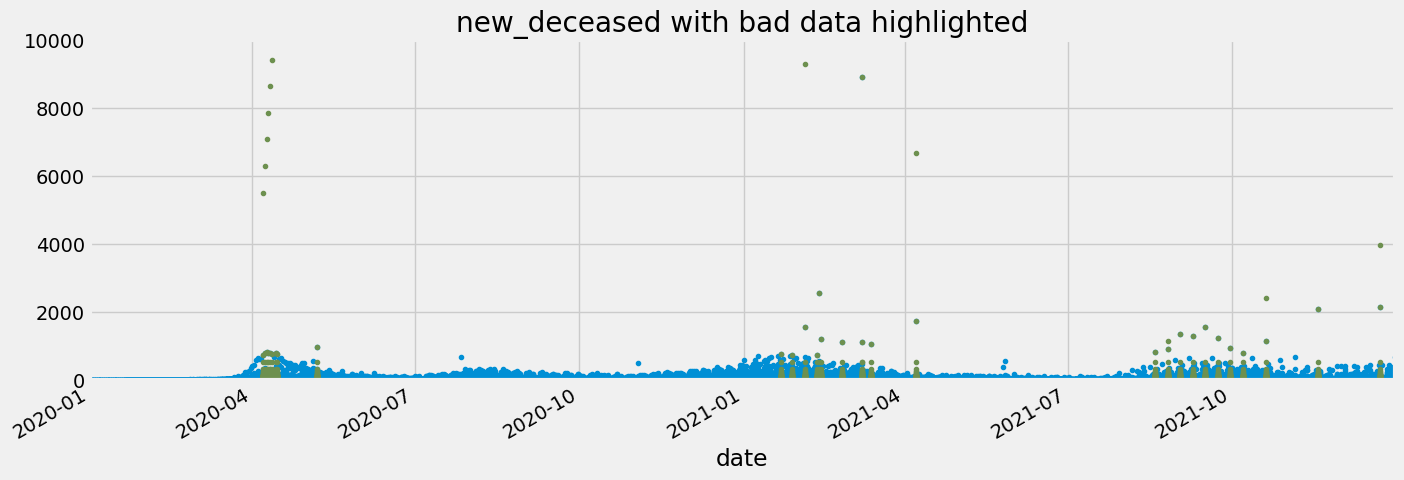

In [79]:
# Altough the calculated threshold is 12, it does not work for our graph and I tuned manually
ax = x_train.new_deceased.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[0],
                     title='new_deceased with bad data highlighted',
                     xlim=('2020-01-01','2021-12-31'),
                     ylim=(0, 10000))
x_train.query('new_deceased > 700').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[3],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

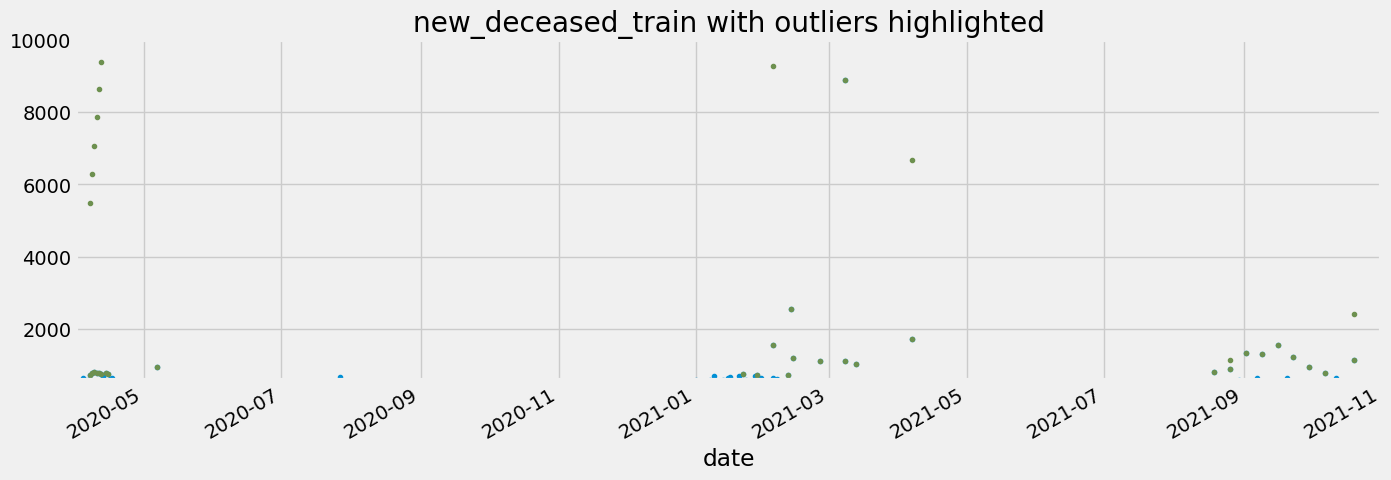

In [80]:
ax = x_train.new_deceased.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[0],
                     title='new_deceased_train with outliers highlighted',
                     xlim=('04-01-2020','11-01-2021'),
                     ylim=(600, 10000)
                    )
x_train.query('new_deceased > 700').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[3],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

In [97]:
# Clean Data
x_train = x_train.query('new_deceased < 700').copy()

In [36]:
x_train.new_persons_fully_vaccinated.quantile([0,0.25,0.75])

0.00      0.0
0.25      0.0
0.75    690.0
Name: new_persons_fully_vaccinated, dtype: float64

In [42]:
IQR = 690-0
print('new_deceased_lower_outliers_bound is',0.0-IQR, 'new_deceased_lower_outliers_bound is', 690+IQR)

new_deceased_lower_outliers_bound is -690.0 new_deceased_lower_outliers_bound is 1380


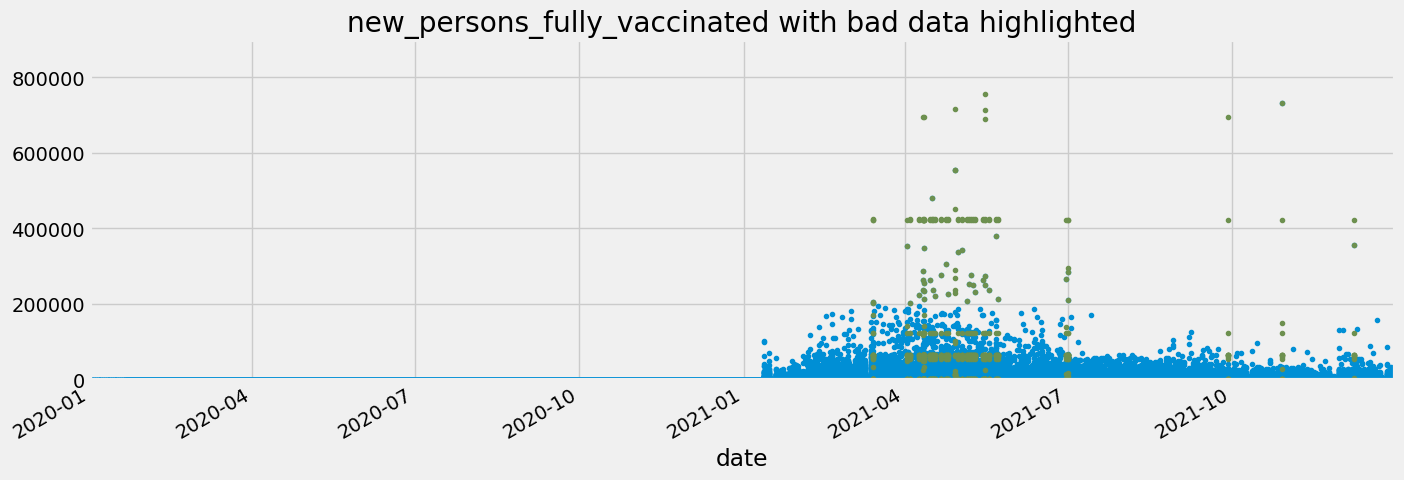

In [82]:
# Altough the calculated threshold is 1380, it does not work for our graph and I tuned manually
ax = x_train.new_persons_fully_vaccinated.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[0],
                     title='new_persons_fully_vaccinated with bad data highlighted',
                     xlim=('2020-01-01','2021-12-31'),
                     ylim=(0, 900000))
x_train.query('new_persons_fully_vaccinated > 200000').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[3],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

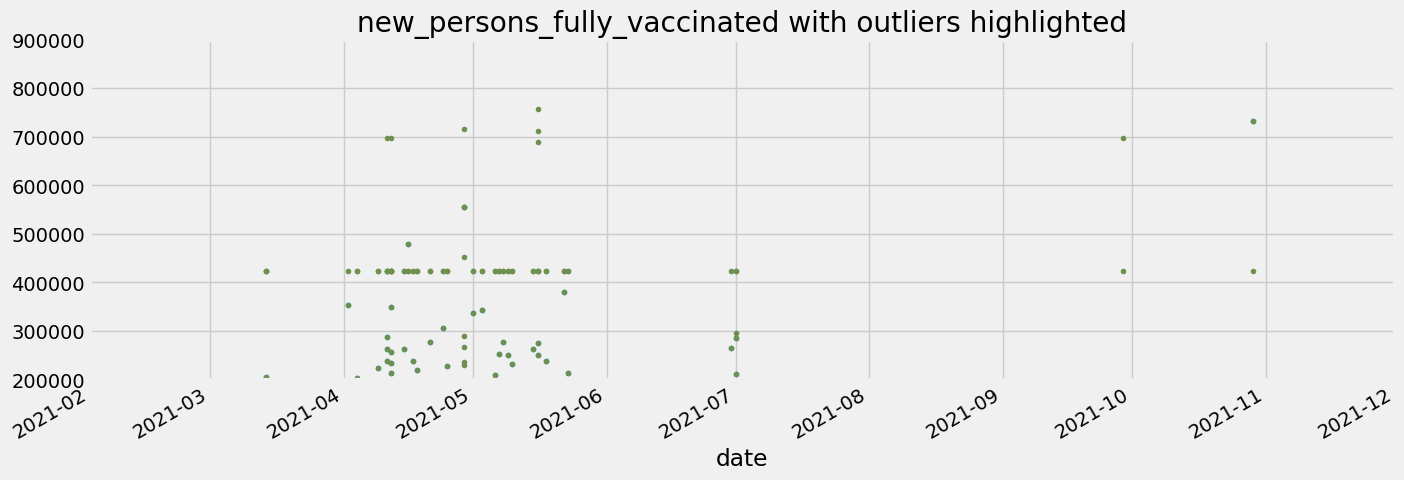

In [94]:
ax = x_train.new_persons_fully_vaccinated.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[0],
                     title='new_persons_fully_vaccinated with outliers highlighted',
                     xlim=('02-01-2021','12-01-2021'),
                     ylim=(200000,900000)
                    )
x_train.query('new_persons_fully_vaccinated > 200000').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[3],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

In [98]:
x_train = x_train.query('new_persons_fully_vaccinated < 200000').copy()

In [84]:
x_train.mobility_workplaces.quantile([0,0.25,0.75])

0.00   -92.0
0.25   -33.0
0.75   -12.0
Name: mobility_workplaces, dtype: float64

In [48]:
IQR = -12-(-33)
print('new_deceased_lower_outliers_bound is',-33-IQR, 'new_deceased_lower_outliers_bound is', -12+IQR)

new_deceased_lower_outliers_bound is -54 new_deceased_lower_outliers_bound is 9


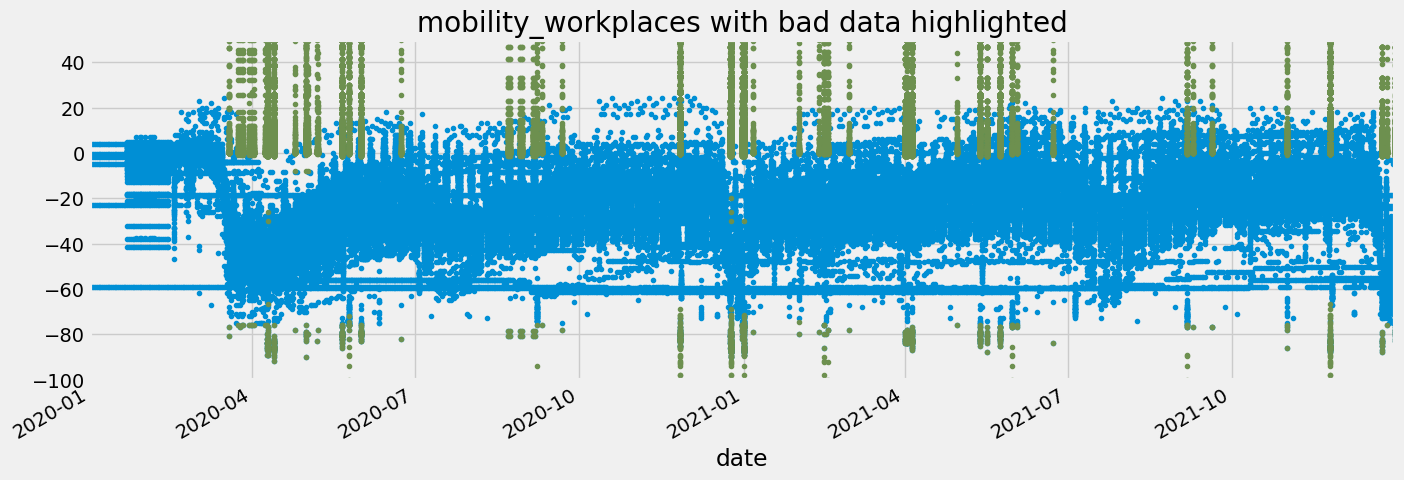

In [105]:
# Altough the calculated threshold is -54 and 9, it does not work for our graph and I tuned manually
ax = x_train.mobility_workplaces.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[0],
                     title='mobility_workplaces with bad data highlighted',
                     xlim=('2020-01-01','2021-12-31'),
                     ylim=(-100, 50))

x_train.query('mobility_workplaces < -75').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[3],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

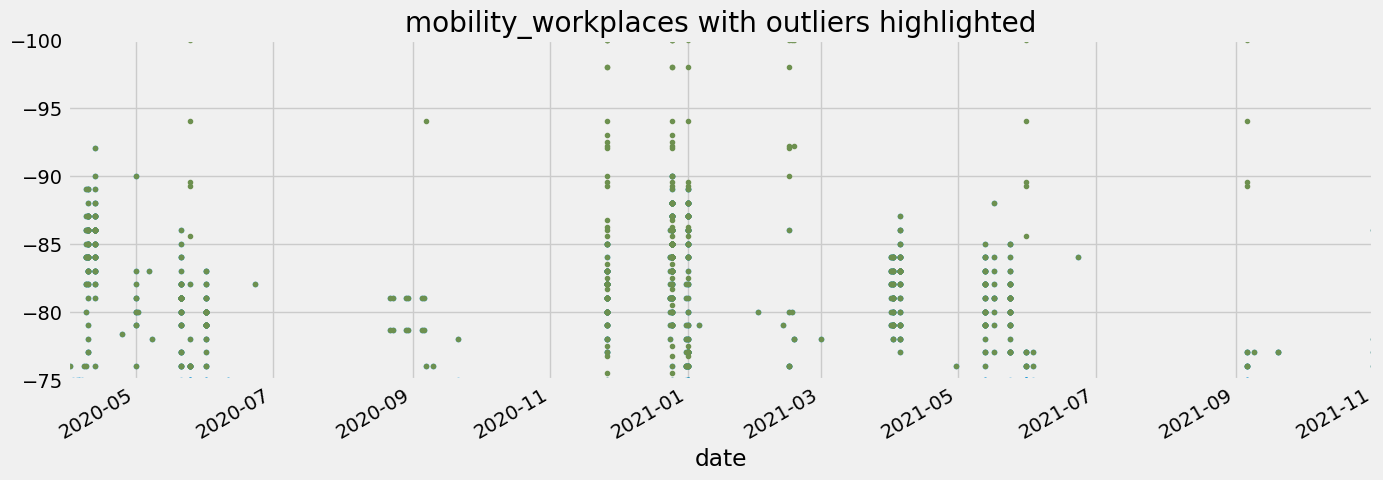

In [106]:
ax = x_train.mobility_workplaces.plot(style='.',
                     figsize=(15,5),
                     color=color_pal[0],
                     title='mobility_workplaces with outliers highlighted',
                     xlim=('04-01-2020','11-01-2021'),
                     ylim=(-75, -100)
                    )
x_train.query('mobility_workplaces < -75').plot(style='.',
                                             figsize=(15,5),
                                             color=color_pal[3],
                                             ax=ax)
ax.legend().set_visible(False)
plt.show()

In [93]:
x_train = x_train.query('mobility_workplaces > -75').copy()